In [42]:
from __future__ import annotations
import os
import argparse
import random
import json
import csv

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

TYPE_ID_CONVERSION = {
    'Car': 0,
    'Cyclist': 1,
    'Pedestrian': 2,
    'Big_Vehicle': 3,
}

def load_annotations(idx):
    annotations = []
    fieldnames = ['type', 'truncated', 'occluded', 'alpha', 'xmin', 'ymin', 'xmax', 'ymax', 'dh', 'dw',
                    'dl', 'lx', 'ly', 'lz', 'ry']
    with open(os.path.join(root, "training", "label_2", idx + ".txt"), 'r') as csv_file:
        reader = csv.DictReader(csv_file, delimiter=' ', fieldnames=fieldnames)
        for line, row in enumerate(reader):
            if row["type"] in ["Car"]:
                annotations.append({
                    "class": row["type"],
                    "label": TYPE_ID_CONVERSION[row["type"]],
                    "truncation": float(row["truncated"]),
                    "occlusion": float(row["occluded"]),
                    "alpha": float(row["alpha"]),
                    "dimensions": [float(row['dl']), float(row['dh']), float(row['dw'])],
                    "locations": [float(row['lx']), float(row['ly']), float(row['lz'])],
                    "rot_y": float(row["ry"])
                })
    with open(os.path.join(root, "training", "calib", idx + ".txt"), 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=' ')
        for line, row in enumerate(reader):
            if row[0] == 'P2:':
                P2 = row[1:]
                P2 = [float(i) for i in P2]
                P2 = np.array(P2, dtype=np.float32).reshape(3, 4)
                break
    return annotations, P2

def encode_label(P, ry, dims, locs):
    l, h, w = dims[0], dims[1], dims[2]
    x, y, z = locs[0], locs[1], locs[2]
    loc_center = np.array([x, y - h / 2, z, 1.0])
    proj_point = np.matmul(P, loc_center)
    depth = proj_point[2]
    proj_point = proj_point[:2] / depth
    return proj_point, depth, loc_center

def scatter_plot(idx_list, c='g'):
    depth_list = []
    pixel_y_list = []
    for idx in tqdm(idx_list): 
        annotations, P2 = load_annotations(idx)
        for anno in annotations:
            proj_point, depth, _ = encode_label(P2, anno['rot_y'], anno['dimensions'], anno['locations'])
            pixel_x, pixel_y = proj_point[0], proj_point[1]
            if abs(pixel_y) < 500: 
                depth_list.append(depth)
                pixel_y_list.append(pixel_y)
    depth_array = np.array(depth_list)
    pixel_y_array = np.array(pixel_y_list)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.scatter(pixel_y_array, depth_array, s=1, c=c)
    

def scatter_plot_xyz(idx_list, c='g', flag="xy"):
    x_list, y_list, z_list = [], [], []
    for idx in tqdm(idx_list): 
        annotations, P2 = load_annotations(idx)
        for anno in annotations:
            proj_point, depth, loc = encode_label(P2, anno['rot_y'], anno['dimensions'], anno['locations'])
            x_list.append(loc[0])
            y_list.append(loc[1])
            z_list.append(loc[2])
    x_array = np.array(x_list)
    y_array = np.array(y_list)
    z_array = np.array(z_list)
    
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    if flag == "xy":
        plt.scatter(x_array, y_array, s=1, c=c)
    elif flag == "yz":
        plt.scatter(y_array, z_array, s=1, c=c)
    elif flag == "xz":
        plt.scatter(x_array, z_array, s=1, c=c)

100%|████████████████████████████████████████████████████████████████████████████████████| 3769/3769 [00:00<00:00, 6187.70it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


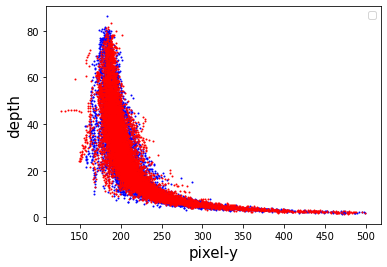

In [43]:
if __name__ == "__main__":
    # root = "/home/yanglei/DataSets/DAIR-V2X/Rope3D-KITTI-v2"
    root = "/home/yanglei/DataSets/KITTI" 
    train_txt = os.path.join(root, "ImageSets", "train.txt")
    val_txt = os.path.join(root, "ImageSets", "val.txt")
    
    train_idx_list = [x.strip() for x in open(train_txt).readlines()]
    val_idx_list = [x.strip() for x in open(val_txt).readlines()]
    scatter_plot(train_idx_list, "b")
    scatter_plot(val_idx_list, 'r')
    
    plt.xlabel("pixel-y", fontdict={'weight': 'normal', 'size': 15})
    plt.ylabel("depth", fontdict={'weight': 'normal', 'size': 15})
    plt.legend() 
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 3769/3769 [00:00<00:00, 5994.29it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


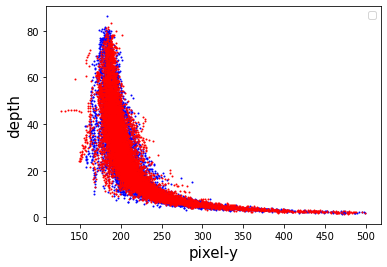

In [44]:
if __name__ == "__main__":
    # root = "/home/yanglei/DataSets/DAIR-V2X/Rope3D-KITTI-v2"
    root = "/home/yanglei/DataSets/KITTI" 
    train_txt = os.path.join(root, "ImageSets", "train.txt")
    val_txt = os.path.join(root, "ImageSets", "val.txt")
    
    train_idx_list = [x.strip() for x in open(train_txt).readlines()]
    val_idx_list = [x.strip() for x in open(val_txt).readlines()]
    scatter_plot(train_idx_list, "b")
    scatter_plot(val_idx_list, 'r')
   
    plt.xlabel("pixel-y", fontdict={'weight': 'normal', 'size': 15})
    plt.ylabel("depth", fontdict={'weight': 'normal', 'size': 15})
    plt.legend() 
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 3769/3769 [00:00<00:00, 6290.75it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


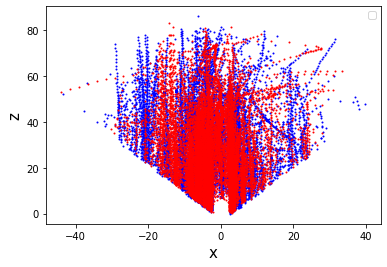

In [37]:
if __name__ == "__main__":
    # root = "/home/yanglei/DataSets/DAIR-V2X/Rope3D-KITTI-v2"
    root = "/home/yanglei/DataSets/KITTI" 
    train_txt = os.path.join(root, "ImageSets", "train.txt")
    val_txt = os.path.join(root, "ImageSets", "val.txt")
    
    train_idx_list = [x.strip() for x in open(train_txt).readlines()]
    val_idx_list = [x.strip() for x in open(val_txt).readlines()]
        
    scatter_plot_xyz(train_idx_list, c="b", flag="xz")
    scatter_plot_xyz(val_idx_list, c='r', flag="xz")
   
    plt.xlabel("x", fontdict={'weight': 'normal', 'size': 15})
    plt.ylabel("z", fontdict={'weight': 'normal', 'size': 15})
    plt.legend() 
    plt.show()